In [127]:
import numpy as np
from matplotlib import pyplot as pl
from scipy import stats

In [155]:
%%time
count = 100_000_000
#np.random.seed(42)

# Generate data with random noise
x = np.random.rand(count) * 10 
y = (np.random.rand() + .5) * x + 2 * np.random.rand(count) - 1 + 5 * np.random.rand()

A = np.array([np.ones(count), x]).T

CPU times: user 6.26 s, sys: 2.7 s, total: 8.96 s
Wall time: 12.4 s


In [156]:
%%time
b = np.linalg.lstsq(A, y)[0]
print(b)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


[0.10760609 0.6050695 ]
CPU times: user 3.93 s, sys: 1.64 s, total: 5.57 s
Wall time: 6.92 s


In [157]:
%%time
b = np.linalg.inv(A.T.dot(A)).dot(A.T.dot(y))
print(b)

[0.10760609 0.6050695 ]
CPU times: user 763 ms, sys: 22.5 ms, total: 785 ms
Wall time: 980 ms


In [158]:
%%time
b = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y))
print(b)

[0.10760609 0.6050695 ]
CPU times: user 743 ms, sys: 15.5 ms, total: 759 ms
Wall time: 1.08 s


In [159]:
%%time
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
b = [intercept, slope]
print(b)

[0.10760609439436797, 0.6050695038103812]
CPU times: user 2.21 s, sys: 1.57 s, total: 3.78 s
Wall time: 5.95 s


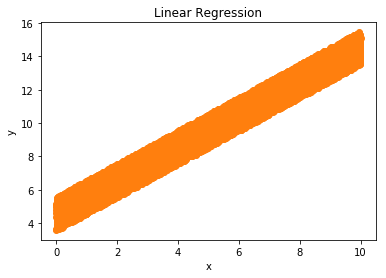

In [154]:
line = b[1]*np.arange(0, 10) + b[0]
pl.plot(line, '-')
pl.plot(x, y, 'o')
pl.title('Linear Regression')
pl.xlabel('x')
pl.ylabel('y')
pl.show()